In [1]:
import csv
import pandas as pd
import requests

In [ ]:
#Trial for one movie

my_api_key = '86a95444'

movie =  'The House'

movie_url = f'http://www.omdbapi.com/?apikey={my_api_key}&t={movie}'
movie_url   
response = requests.get(movie_url).json()
response

In [2]:
#Import the original data
movies_df = pd.read_csv('movie_profit.csv')
movies_df.head()
movies_df.size

30609

In [3]:
#Create the list of movies to check
movie_list =  movies_df['movie']
movie_list

0                          Evan Almighty
1                             Waterworld
2       King Arthur: Legend of the Sword
3                               47 Ronin
4         Jurassic World: Fallen Kingdom
                      ...               
3396                          Like Crazy
3397                          Chuck&Buck
3398         Love and Other Catastrophes
3399          I Married a Strange Person
3400                            November
Name: movie, Length: 3401, dtype: object

In [ ]:
#Create empty lists for the data to store
runtime=[]
director=[]
writer=[]
actors=[]
language=[]
country=[]
awards=[]
poster=[]
metascore=[]
imdbRating=[]
imdbVotes=[]
boxOffice=[]

#Create the list of apykeys to ise
#necesitamos 35 apikeys para hacer 3401 request por cada película 
api_keys = ['42da6ef4','527c57ea','de9fb1ae','15113b47', '2c9fe135','37882f82','5a99821e','b90d04ce','66304108','ce6170a2','eef2dc','42777bba','23541de1',\
            'af8eeea0','d1411885','d17417e2','','','','','','','','','','','','','','','','','','','','','','']
key_index = 0
request_count = 0


#The loop to make the requests from the apikey
for movie in movie_list:
    #take the api key from the list according to the key_index value
    my_api_key= api_keys[key_index]
    movie_url = f'http://www.omdbapi.com/?apikey={my_api_key}&t={movie}'


    #make the request & store the information in the lists
    response = requests.get(movie_url).json()
    try:
        runtime.append(response['Runtime'])
        director.append(response['Director'])
        writer.append(response['Writer'])
        actors.append(response['Actors'])
        language.append(response['Language'])
        country.append(response['Country'])
        awards.append(response['Awards'])
        poster.append(response['Poster'])
        metascore.append(response['Metascore'])
        imdbRating.append(response['imdbRating'])
        imdbVotes.append(response['imdbVotes'])
        boxOffice.append(response['BoxOffice'])
    except:
        runtime.append('Movie not found')
        director.append('Movie not found')
        writer.append('Movie not found')
        actors.append('Movie not found')
        language.append('Movie not found')
        country.append('Movie not found')
        awards.append('Movie not found')
        poster.append('Movie not found')
        metascore.append('Movie not found')
        imdbRating.append('Movie not found')
        imdbVotes.append('Movie not found')
        boxOffice.append('Movie not found')
    #add 1 to the request count
    request_count += 1

    #when it hits the iteration 990 change to the next apykey and reset the count
    if request_count >= 990:
        key_index += 1
        request_count = 0

#store the lists in the data frame
movies_df['Runtime'] = runtime
movies_df['Director'] = director
movies_df['Writer'] = writer
movies_df['Actors'] = actors
movies_df['Language'] = language
movies_df['Country'] = country
movies_df['Awards'] = awards
movies_df['Poster'] = poster
movies_df['Metascore'] = metascore
movies_df['imdbRating'] = imdbRating
movies_df['imdbVotes'] = imdbVotes
movies_df['BoxOffice'] = boxOffice



# Sample Code

In [2]:
sample_df = pd.read_csv('Sample_df_complete.csv')
sample_df.head()

,Unnamed: 0.1,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Writer,Actors,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice
0,0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy,...,"Steve Oedekerk, Joel Cohen, Alec Sokolow","Steve Carell, Morgan Freeman, Lauren Graham",English,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298"
1,1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action,...,"Peter Rader, David Twohy","Kevin Costner, Jeanne Tripplehorn, Dennis Hopper",English,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220"
2,2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure,...,"Joby Harold, Guy Ritchie, Lionel Wigram","Charlie Hunnam, Astrid Bergès-Frisbey, Jude Law",English,"United Kingdom, United States, Australia",10 nominations,https://m.media-amazon.com/images/M/MV5BMjM3OD...,41,6.7,"226,822","$39,175,066"
3,3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action,...,"Chris Morgan, Hossein Amini, Walter Hamada","Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki","English, Japanese","United States, United Kingdom, Japan, Hungary",5 nominations,https://m.media-amazon.com/images/M/MV5BMTc0Mj...,28,6.2,"167,943","$38,362,475"
4,4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action,...,"Derek Connolly, Colin Trevorrow, Michael Crichton","Chris Pratt, Bryce Dallas Howard, Rafe Spall","English, Russian","United States, China",4 wins & 26 nominations,https://m.media-amazon.com/images/M/MV5BNzIxMj...,51,6.1,"334,600","$417,719,760"


In [8]:
#Add the revenue in money and in percentage 
sample_df['Revenue'] = sample_df['worldwide_gross']-sample_df['production_budget']

sample_df['%_Revenue'] = (sample_df['Revenue']/sample_df['production_budget'])*100

#Add the list of actors in each movie
sample_df['Actors'].str.split(',')
sample_df['Actors List'] = sample_df['Actors'].str.split(',')

sample_df.head()

,Unnamed: 0.1,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Actors List
0,0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy,...,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298",-8.686710e+05,-0.496383,"[Steve Carell, Morgan Freeman, Lauren Graham]"
1,1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action,...,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220",8.924622e+07,50.997840,"[Kevin Costner, Jeanne Tripplehorn, Dennis H..."
2,2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure,...,"United Kingdom, United States, Australia",10 nominations,https://m.media-amazon.com/images/M/MV5BMjM3OD...,41,6.7,"226,822","$39,175,066",-3.504929e+07,-20.028167,"[Charlie Hunnam, Astrid Bergès-Frisbey, Jude..."
3,3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action,...,"United States, United Kingdom, Japan, Hungary",5 nominations,https://m.media-amazon.com/images/M/MV5BMTc0Mj...,28,6.2,"167,943","$38,362,475",-2.328318e+07,-13.304677,"[Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki]"
4,4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action,...,"United States, China",4 wins & 26 nominations,https://m.media-amazon.com/images/M/MV5BNzIxMj...,51,6.1,"334,600","$417,719,760",1.134866e+09,667.568425,"[Chris Pratt, Bryce Dallas Howard, Rafe Spall]"


## Analysis of genres

<Axes: title={'center': 'Revenue'}, xlabel='genre'>

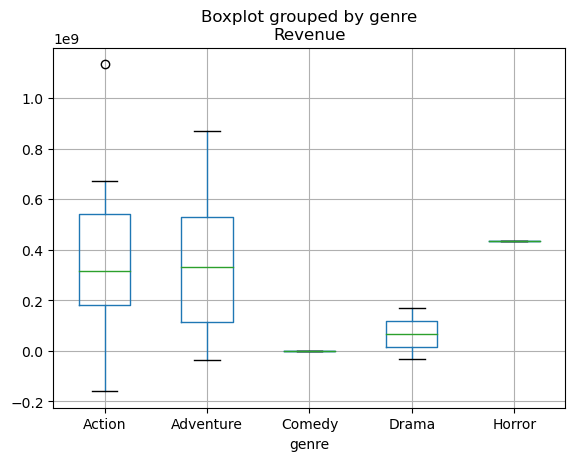

In [5]:
#Analize the revenue of movies by genre
genres_ls = sample_df['genre'].unique()
sample_df.boxplot(column='Revenue', by='genre')


In [ ]:
#Genre vs budget
#Hypothesis test to check if there is a cheaper or more expensive genre to create

##  Make a hypothesis test to check if the genre of the movies is relevant to the revenue

H0: Mean(Action) = Mean(Adventure) = Mean(Comedy) = Mean(Drama) = Mean(Horror)
H1: At leat one mean is different

Anova for multiple means

In [ ]:
#Popularity of genres
#Make a graph that counts how many movies of each genre are in the database

In [ ]:
#Favorite genre by distributor

# Focus in the most profitable genre and who are the principal distributors of it 

#Rating of each genre to see which one is better rated (Metascore, imdbRating) 
#Comparision of these ratings (Metascore = Critics sites around the world & imbd = Users votes from imdb platform)



## Analysis by year

In [ ]:
# Count of movies done by year (trimestral from 2018)

#Count of revenue of movies in one specific genre (trimestral from 2018)

#Revenue per producer per year 

#Boxoffice by year (general and one genre)

## Actors analysis

In [ ]:
# Most popular actors

#The actors that have more revenue 

#The genres of the most popular actors 




In [17]:
sample_df_exploded = sample_df.explode("Actors List")
actor_counts = sample_df_exploded["Actors List"].value_counts()
pd.DataFrame(actor_counts).sort_values(by='count', ascending=False)

,count
Actors List,
Arnold Schwarzenegger,2
Keanu Reeves,2
Mike Myers,2
Kate Beckinsale,2
Kurt Russell,2
...,...
Tom Cruise,1
Rebecca Ferguson,1
Jeremy Renner,1
